# Observed Taylor law: variance vs mean 
**in the protein coding gene length distributions for the different species**

## Import python modules

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from plotnine import *

import sys
sys.path.append('../gl_lib/')
import gl_constants as c
import gl_plot as gl_p

## The protein coding gene length distributions for the different species

### Retrieving the statistical descriptions of the gene length's distributions

#### Statistical description 

In [2]:
# statistics on length distributions 
stat_file = c.STAT_G_FILE
if 0:
    print("The statistical descriptions of the protein coding gene distributions " + \
        "for the different species is in:\n", stat_file, "\n")

# retrieve data and diminish the number of columns
stat_df = pd.read_csv(stat_file, low_memory=False, sep="\t")
stat_df = stat_df[["division_both_dbs", "species", "count", "mean", "var", "log10_mean", "log10_var"]]

# visualize data
if 1:
    pd.set_option('display.max_columns', len(stat_df.columns))
    display(stat_df.sample(2))
    print(stat_df.shape)
    print(stat_df["division_both_dbs"].value_counts())

,division_both_dbs,species,count,mean,var,log10_mean,log10_var
17560,bacteria,oceanobacillus_halophilus_gca_003628505,3728,890.195815,323157.282816,2.863564,0.081190
6888,bacteria,enterococcus_faecalis_gca_005238435,2819,899.345158,415441.938666,2.847090,0.102817


(33627, 7)
division_both_dbs
bacteria         30714
archaea           1229
fungi             1014
protists           237
vertebrates        222
invertebrates      115
plants              96
Name: count, dtype: int64


## Python Functions

In [3]:
def plot_taylor_genes__cambric_explosion (df2plot, col_x, col_y, x_lab, y_lab, title, legends_by,\
     bool_show_regression, L1, L2): 
    #Calculate best fit line
    slope, intercept, r_value, p_value, std_err = \
        stats.linregress(np.log10(df2plot[col_x]),np.log10(df2plot[col_y]))
    #Format the regression text
    if 0: 
        print("v = {:4.4} * m^{:4.4};   R^2= {:2.4f}".format(10**intercept, slope, r_value**2))
    if bool_show_regression:
        txt = '$\sigma^{2} = ' + '{:4.2} '.format(10**intercept)  + ' \t ' +\
             '\mu^{' + '{:4.3}'.format(slope) + '}' + ';\tR^{2} = ' + '{:2.2f}$'.format(r_value**2)
    else:
        txt = ''
   
    p = (   
        ggplot(df2plot, aes(col_x, col_y, color=legends_by)) + 
        geom_point(size=0.15) + #, alpha=0.4 + # color, fill )
        geom_smooth(method="lm", color="green", size=0.25, span=.8)
        + geom_vline(xintercept=L1, color="gray")  # add one vertical line
        #+ geom_vline(xintercept=L2, color="gray")  # add one vertical line
        + labs(title=title, x=x_lab, y=y_lab) 
        + scale_color_manual(values=c.COLOR_ORG_GROUPS) 
        + labs(color='Group of organisms') # legend title
        + scale_x_log10(breaks=[10 ** power for power in range(6)],
          limits=[min(df2plot[col_x].to_list())/2, 2*max(df2plot[col_x].to_list())]) 
        + scale_y_log10(breaks = [10**power for power in range(13)], 
          limits = [min(df2plot[col_y].to_list())/2,2*max(df2plot[col_y].to_list())])#, labels=scientific_for
    ) + theme(legend_position=(0.95,0.1), legend_key_size=2, \
        legend_background=element_rect(fill='grey', alpha=0.01)) + \
            annotate('text', x=0.01*max(df2plot[col_x].to_list()), \
                y=0.65*max(df2plot[col_y].to_list()), label=txt,size=9,color="black")
    p.show()

## Variance vs. mean (represented in $log_{10}$ scale)
### Protein coding gene length distributions  
$\sigma^{2}$ is the variance   
$\mu$ is the mean  

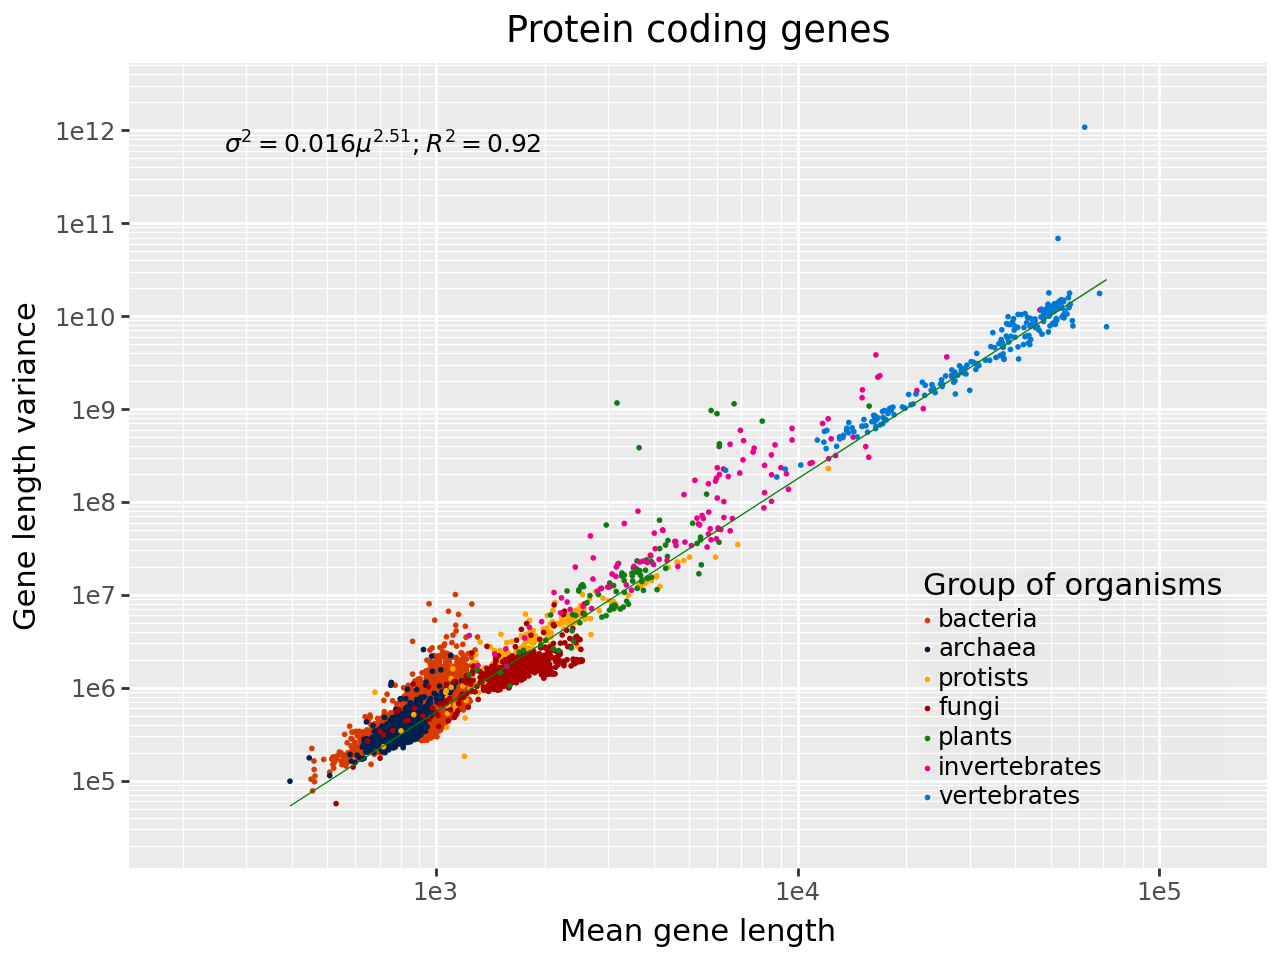

In [4]:
col_x = "mean"  
col_y = "var"  
legends_by = "division_both_dbs"

title = "Protein coding genes" # "Uniprot, reference Proteomes (protein length)"
x_lab = "Mean gene length"   
y_lab = "Gene length variance"
bool_show_regression = True

df2plot = stat_df
if 0:
    print(df2plot.shape)

# Sort division_both_dbs in order to plot the color of the clades in order
if 0:
    print(df2plot.division_both_dbs.unique())
df2plot.division_both_dbs = pd.Categorical(df2plot.division_both_dbs, 
                                categories=c.ORG_GROUPS,           
                                ordered=True)
df2plot.sort_values('division_both_dbs', inplace=True)

gl_p.plot_taylor_genes(df2plot, col_x, col_y, x_lab, y_lab, title, legends_by, bool_show_regression)

#### Note:  
$\sigma^{2} = a . \mu^{\beta}$   
Because the regression line is:  
$\log(\sigma^{2}) = \log(a) + \beta log(\mu) $

## CAMBRIC EXPLOSION (start)

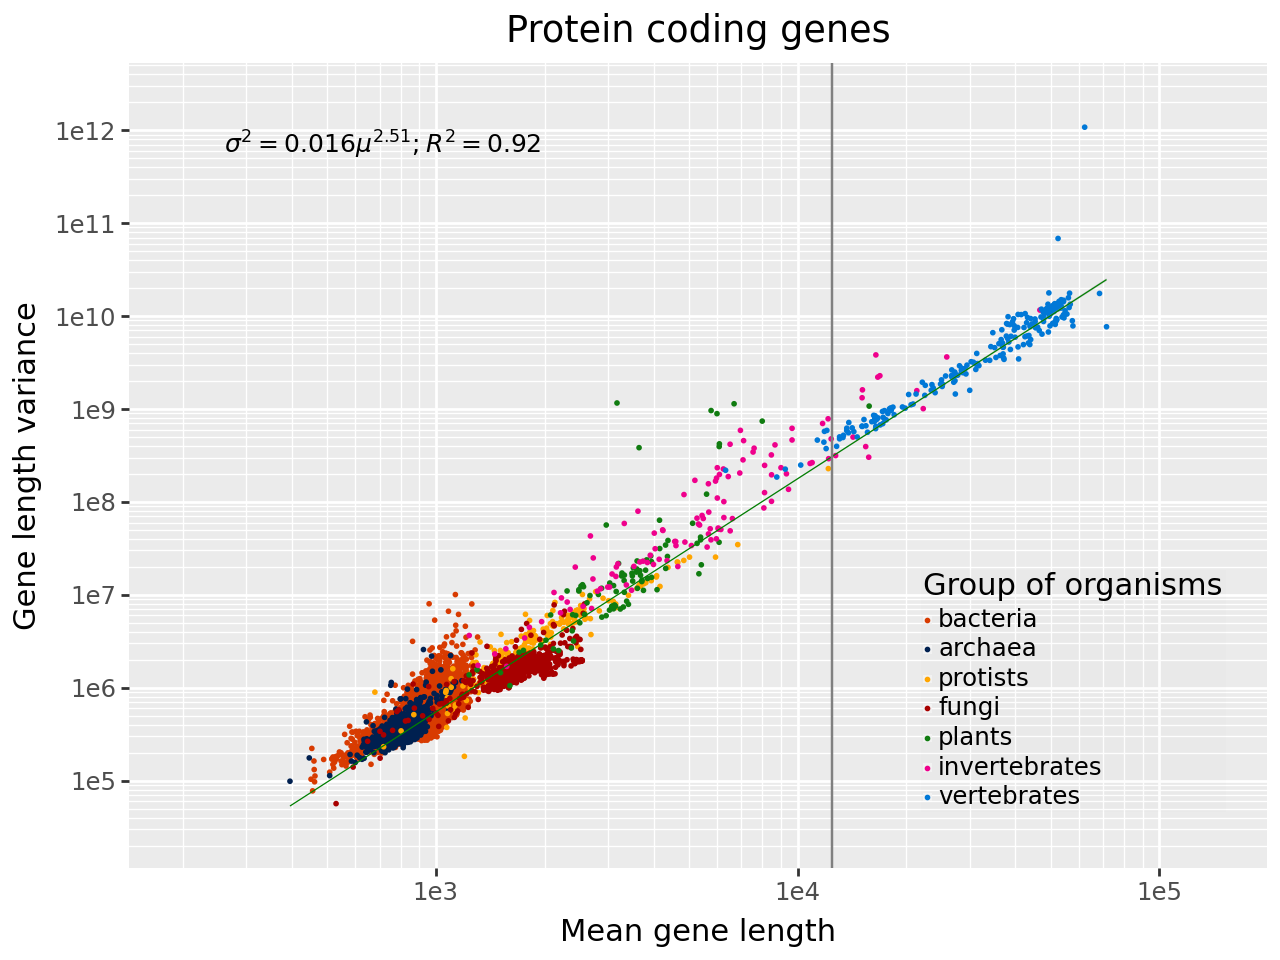

In [5]:
L1 = 12464
L2 = 12758
plot_taylor_genes__cambric_explosion(df2plot, col_x, col_y, x_lab, y_lab, title, legends_by, bool_show_regression, L1, L2)